In [39]:
date = '2021-11-01'
year, month, day = date.split('-')
day_to_trade=day
month_to_trade=month
year_to_trade=year
print(month)

flage = False
if int(day)<10:
    day_to_trade = str(0)+str(int(day)+1)
    print('bo')
if (day!='30' or day!='31') and int(day)>=10 :
    day_to_trade = str(int(day)+1)
    print('1')

if month=='02'and day=='28' :
    day_to_trade = '01'
    flage = True
    print('2')

if day=='30' or day=='31' :
    day_to_trade = '01'
    flage = True
    print('3')

if month!='12' and flage == True and int(month)<10:
    month_to_trade = str(0)+str(int(month)+1)
    print('4')
if month!='12' and flage == True and int(month)>=10:
    month_to_trade = str(int(month)+1)
    print('4')
flage2 = False
if month=='12' and flage == True:
    month_to_trade = '01'
    flage2 = True
    print('5')
if flage2 == True:
    year_to_trade = str(int(year) + 1)
print(year_to_trade)
print(month_to_trade)
print(day_to_trade)
date_to_trade = f"{year_to_trade}-{month_to_trade}-{day_to_trade}"
print(date_to_trade)


11
bo
2021
11
02
2021-11-02


In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

import pandas as pd
# Load the list of all tradable companies on NSE
nifty500_symbols = pd.read_csv("nifty_500.csv")
nifty500_symbols = nifty500_symbols['Symbol'].tolist()
# Remove '.NS' from each symbol
selected_stocksnifty500 = [symbol.replace('.NS', '') for symbol in nifty500_symbols]
selected_stocksnifty500 = [symbol + '.NS' for symbol in nifty500_symbols]

def get_day_data(symbol, str_date, end_date):
    # Fetch historical data using yfinance
    data = yf.download(symbol, start=str_date, end=end_date, interval='1d')
    # Reset the index to get 'Date' as a column
    data.reset_index(inplace=True)
    # Select only the 'Date', 'Open', 'Close', 'Low', 'High' columns
    df_selected = data[['Date', 'Open', 'Close', 'Low', 'High']]
    return df_selected

def calculate_averages2(symbol, date, window=8):
    end_date = datetime.strptime(date, '%Y-%m-%d')
    start_date = end_date - timedelta(days=window)
    data = get_day_data(symbol, start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))
    data['High'] = data['High'].astype(float)
    data['Low'] = data['Low'].astype(float)
    data['Close'] = data['Close'].astype(float)
    avg_high = data['High'].mean()
    avg_low = data['Low'].mean()
    avg_price = data['Close'].mean()
    return avg_high, avg_low, avg_price

# Function to find stocks with low-high difference within 1.5% of average price
def find_stocks_with_wide_range(symbols, date, window=30, threshold=0.015):
    selected_stocks = []

    for symbol in symbols:
        avg_high, avg_low, avg_price = calculate_averages2(symbol, date, window)
        if avg_price == 0:
            continue
        
        price_range = avg_high - avg_low
        price_range_percentage = (price_range / avg_price) * 100
        if price_range >= threshold * avg_price:
            selected_stocks.append((symbol, avg_low, avg_high, avg_price, price_range, price_range_percentage))

    # Sort selected stocks by price range percentage
    selected_stocks.sort(key=lambda x: x[5])

    return selected_stocks

# Assuming symbols and selected_stocksnifty500 are defined appropriately
symbols = selected_stocksnifty500  # Replace with your list of symbols

# Find stocks with wide range
wide_range_stocks = find_stocks_with_wide_range(symbols, date='2021-04-30')

# Display selected stocks7
print("Selected Stocks with Wide Price Range:")
for stock in wide_range_stocks:
    symbol, avg_low, avg_high, avg_price, price_range, price_range_percentage = stock
    print(f"Stock: {symbol}")
    print(f"  Average Low: {avg_low:.2f}")
    print(f"  Average High: {avg_high:.2f}")
    print(f"  Average Price: {avg_price:.2f}")
    print(f"  Price Range: {price_range:.2f} ({price_range_percentage:.2f}%)")
    print("\n")
sss= wide_range_stocks[-3:]
for stock in sss:
    symbol, avg_low, avg_high, avg_price, price_range, price_range_percentage = stock
    print(f"Stock: {symbol}")
    print(f"  Average Low: {avg_low:.2f}")
    print(f"  Average High: {avg_high:.2f}")
    print(f"  Average Price: {avg_price:.2f}")
    print(f"  Price Range: {price_range:.2f} ({price_range_percentage:.2f}%)")
    print("\n")

[*********************100%%**********************]  1 of 1 completed
C:\Users\iamha\AppData\Local\Temp\ipykernel_8032\3167180169.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['High'] = data['High'].astype(float)
C:\Users\iamha\AppData\Local\Temp\ipykernel_8032\3167180169.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Low'] = data['Low'].astype(float)
C:\Users\iamha\AppData\Local\Temp\ipykernel_8032\3167180169.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

$TATACOFFEE.NS: possibly delisted; No price data found  (1d 2021-03-31 -> 2021-04-30)


[*********************100%%**********************]  1 of 1 completed
C:\Users\iamha\AppData\Local\Temp\ipykernel_8032\3167180169.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['High'] = data['High'].astype(float)
C:\Users\iamha\AppData\Local\Temp\ipykernel_8032\3167180169.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Low'] = data['Low'].astype(float)
C:\Users\iamha\AppData\Local\Temp\ipykernel_8032\3167180169.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Selected Stocks with Wide Price Range:
Stock: SANOFI.NS
  Average Low: 7792.42
  Average High: 7927.00
  Average Price: 7841.10
  Price Range: 134.59 (1.72%)


Stock: ABBOTINDIA.NS
  Average Low: 14909.27
  Average High: 15179.32
  Average Price: 15048.45
  Price Range: 270.05 (1.79%)


Stock: TATAINVEST.NS
  Average Low: 1006.70
  Average High: 1025.39
  Average Price: 1015.47
  Price Range: 18.69 (1.84%)


Stock: ITC.NS
  Average Low: 207.48
  Average High: 211.40
  Average Price: 209.13
  Price Range: 3.92 (1.87%)


Stock: COLPAL.NS
  Average Low: 1529.83
  Average High: 1559.82
  Average Price: 1540.94
  Price Range: 29.98 (1.95%)


Stock: RELIANCE.NS
  Average Low: 1794.84
  Average High: 1830.38
  Average Price: 1810.68
  Price Range: 35.54 (1.96%)


Stock: IOC.NS
  Average Low: 59.34
  Average High: 60.52
  Average Price: 59.91
  Price Range: 1.18 (1.96%)


Stock: DABUR.NS
  Average Low: 548.92
  Average High: 559.84
  Average Price: 553.97
  Price Range: 10.92 (1.97%)


Stock: 


C:\Users\iamha\AppData\Local\Temp\ipykernel_8032\3167180169.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['High'] = data['High'].astype(float)
C:\Users\iamha\AppData\Local\Temp\ipykernel_8032\3167180169.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Low'] = data['Low'].astype(float)
C:\Users\iamha\AppData\Local\Temp\ipykernel_8032\3167180169.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [2]:
api_key = "747QS5711RP3#8YK69T038109f3638Y2"

api_secret = "@e6T448hRz&7576910$1t6zC37602b52"

session_token = "45533318"

symbol = ['ADAGRE']

In [3]:
from breeze_connect import BreezeConnect
import urllib
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Initialize SDK
breeze = BreezeConnect(api_key=api_key)

# Obtain your session key URL
login_url = "https://api.icicidirect.com/apiuser/login?api_key=" + urllib.parse.quote_plus(api_key)
print(login_url)

# Generate Session
breeze.generate_session(api_secret=api_secret, session_token=session_token)


h_data = breeze.get_historical_data(interval="5minute",
                        from_date= "2023-01-20T07:00:00.000Z",
                        to_date= "2023-02-24T07:00:00.000Z",
                        stock_code=symbol,
                        exchange_code="NSE",
                        product_type="cash")
# Convert historical data to DataFrame
df = pd.DataFrame(h_data['Success'])

# Select only the 'time', 'open', and 'close' columns
df_selected2 = df[['datetime', 'open', 'close']]
# df_selected2 = get_day_per5min_data()
df_selected2

https://api.icicidirect.com/apiuser/login?api_key=747QS5711RP3%238YK69T038109f3638Y2


,datetime,open,close
0,2023-01-20 09:10:00,1965,1965
1,2023-01-20 09:15:00,1965.7,1998.1
2,2023-01-20 09:20:00,1997.5,1988.2
3,2023-01-20 09:25:00,1990,1980.05
4,2023-01-20 09:30:00,1978.2,1980
...,...,...,...
2041,2023-02-24 15:40:00,486.5,486.5
2042,2023-02-24 15:45:00,486.5,486.5
2043,2023-02-24 15:50:00,486.5,486.5
2044,2023-02-24 15:55:00,486.5,486.5


In [12]:
import pandas as pd
# Read the CSV file into a DataFrame
df_selected2 = pd.read_csv(f'df_total_{symbol}.csv')

In [4]:
df_total = df_selected2.copy()
df_total.to_csv(f'df_total_{symbol}.csv', index=False)

In [5]:
df_total

,datetime,open,close
0,2023-01-20 09:10:00,1965,1965
1,2023-01-20 09:15:00,1965.7,1998.1
2,2023-01-20 09:20:00,1997.5,1988.2
3,2023-01-20 09:25:00,1990,1980.05
4,2023-01-20 09:30:00,1978.2,1980
...,...,...,...
2041,2023-02-24 15:40:00,486.5,486.5
2042,2023-02-24 15:45:00,486.5,486.5
2043,2023-02-24 15:50:00,486.5,486.5
2044,2023-02-24 15:55:00,486.5,486.5


In [6]:
import pandas as pd

# Assuming df_selected2 is your DataFrame
df_total = df_selected2.copy()

start_date = '2021-05-01'
end_date = '2021-06-01'
df_selected2['datetime'] = pd.to_datetime(df_selected2['datetime'])

# Grouping by the date part of 'datetime'
dfs = {}
for date, group in df_selected2.groupby(df_selected2['datetime'].dt.date):
    df_name = f'df_selected_{date}'
    dfs[df_name] = group.reset_index(drop=True)
    globals()[df_name] = group.reset_index(drop=True)

# Extract keys from the dfs dictionary
dfs_keys = list(dfs.keys())

# Convert dfs keys to dates (ensure the format is consistent)
available_dates = [pd.to_datetime(key.split('_')[-1]) for key in dfs_keys]

# Print available dates for debugging
print("Available dates:", available_dates)

# Create a filtered date range based on available dates
filtered_date_range = available_dates.copy()

# Print the filtered date range for debugging
print("Filtered date range:", filtered_date_range)


Available dates: [Timestamp('2023-01-20 00:00:00'), Timestamp('2023-01-23 00:00:00'), Timestamp('2023-01-24 00:00:00'), Timestamp('2023-01-25 00:00:00'), Timestamp('2023-01-27 00:00:00'), Timestamp('2023-01-30 00:00:00'), Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-01 00:00:00'), Timestamp('2023-02-02 00:00:00'), Timestamp('2023-02-03 00:00:00'), Timestamp('2023-02-06 00:00:00'), Timestamp('2023-02-07 00:00:00'), Timestamp('2023-02-08 00:00:00'), Timestamp('2023-02-09 00:00:00'), Timestamp('2023-02-10 00:00:00'), Timestamp('2023-02-13 00:00:00'), Timestamp('2023-02-14 00:00:00'), Timestamp('2023-02-15 00:00:00'), Timestamp('2023-02-16 00:00:00'), Timestamp('2023-02-17 00:00:00'), Timestamp('2023-02-20 00:00:00'), Timestamp('2023-02-21 00:00:00'), Timestamp('2023-02-22 00:00:00'), Timestamp('2023-02-23 00:00:00'), Timestamp('2023-02-24 00:00:00')]
Filtered date range: [Timestamp('2023-01-20 00:00:00'), Timestamp('2023-01-23 00:00:00'), Timestamp('2023-01-24 00:00:00'), Timestam

C:\Users\iamha\AppData\Local\Temp\ipykernel_22820\796950633.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected2['datetime'] = pd.to_datetime(df_selected2['datetime'])


In [7]:
filtered_date_range

[Timestamp('2023-01-20 00:00:00'),
 Timestamp('2023-01-23 00:00:00'),
 Timestamp('2023-01-24 00:00:00'),
 Timestamp('2023-01-25 00:00:00'),
 Timestamp('2023-01-27 00:00:00'),
 Timestamp('2023-01-30 00:00:00'),
 Timestamp('2023-01-31 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-02-02 00:00:00'),
 Timestamp('2023-02-03 00:00:00'),
 Timestamp('2023-02-06 00:00:00'),
 Timestamp('2023-02-07 00:00:00'),
 Timestamp('2023-02-08 00:00:00'),
 Timestamp('2023-02-09 00:00:00'),
 Timestamp('2023-02-10 00:00:00'),
 Timestamp('2023-02-13 00:00:00'),
 Timestamp('2023-02-14 00:00:00'),
 Timestamp('2023-02-15 00:00:00'),
 Timestamp('2023-02-16 00:00:00'),
 Timestamp('2023-02-17 00:00:00'),
 Timestamp('2023-02-20 00:00:00'),
 Timestamp('2023-02-21 00:00:00'),
 Timestamp('2023-02-22 00:00:00'),
 Timestamp('2023-02-23 00:00:00'),
 Timestamp('2023-02-24 00:00:00')]

In [14]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Define the start date as a string and convert it to a datetime object
start_date_str = '2023-02-10'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')

# Calculate the end date
end_date_ra = start_date - timedelta(days=4)

# Download data using yfinance
data = yf.download('ADANIGREEN.NS', start=end_date_ra.strftime('%Y-%m-%d'), end=start_date.strftime('%Y-%m-%d'), interval='1d')

# Reset the index to get 'Date' as a column
data.reset_index(inplace=True)

print(data)

# Calculate the percentage difference in the close of the first and last date
first_close = data['Close'].iloc[0]
last_close = data['Close'].iloc[-1]
percentage_difference = ((last_close - first_close) / first_close) * 100

print(f"Percentage difference in close prices: {percentage_difference:.2f}%")


[*********************100%%**********************]  1 of 1 completed

        Date        Open        High         Low       Close   Adj Close  \
0 2023-02-09  770.049988  798.950012  762.349976  762.349976  762.349976   
1 2023-02-10  732.000000  744.000000  724.250000  724.250000  724.250000   

    Volume  
0  4729491  
1  2074917  
Percentage difference in close prices: -5.00%


KeyError: '2023-02-06'

https://api.icicidirect.com/apiuser/login?api_key=747QS5711RP3%238YK69T038109f3638Y2
2023-01-20T07:00:00.000Z
 
2144.0125   2011.8375
Day High: 2008, Day Low: 1958.5
long bought at  1965.0
closing =  1965.0
 
closing =  1965.0
long sell at  1998.1
 
long bought at  1988.2
closing =  1988.2
 
closing =  1988.2
long sell at  1990.95
 
long bought at  1993.0
closing =  1993.0
 
closing =  1993.0
long sell at  1993.8
 
long bought at  1990.5
closing =  1990.5
 
closing =  1990.5
long sell at  1992.0
 
long bought at  1990.4
closing =  1990.4
 
closing =  1990.4
long sell at  1991.3
 
long bought at  1990.45
closing =  1990.45
 
closing =  1990.45
long sell at  1991.85
 
long bought at  1994.7
closing =  1994.7
 
 
2023-01-23T07:00:00.000Z
 
2093.35   1993.3333333333333
Day High: 2009.05, Day Low: 1911.3
closing =  1994.7
long sell at  2005.0
 
long bought at  1989.95
closing =  1989.95
 
closing =  1989.95
long sell at  1992.9
 
long bought at  1988.55
closing =  1988.55
 
 
2023-01-24T07:

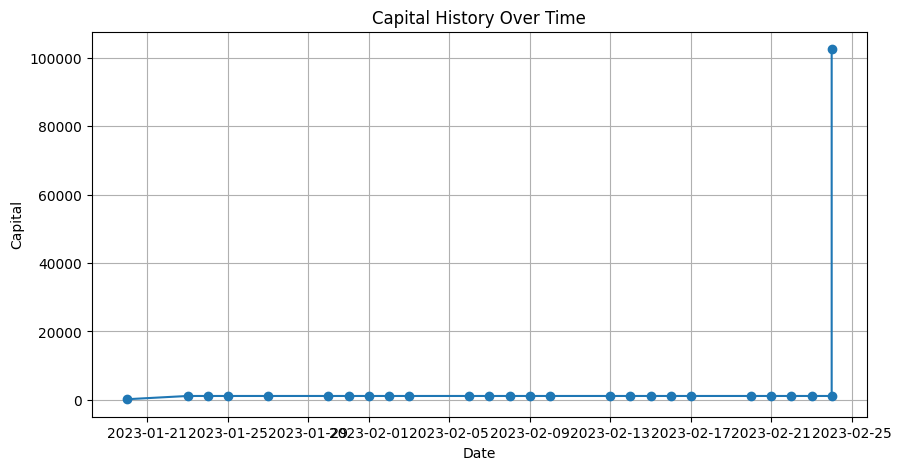

In [8]:
import yfinance as yf
from breeze_connect import BreezeConnect  # Assuming you have a Breeze API client library
from datetime import datetime, timedelta
import pandas as pd
import urllib
import matplotlib.pyplot as plt

# Define the date range and selected stock symbols
start_date = '2023-01-20'
end_date = '2023-02-24'
symbols = ["ADAGRE"]  # Replace with your list of stock symbols

# Initialize SDK
breeze = BreezeConnect(api_key=api_key)

# Obtain your session key URL
login_url = "https://api.icicidirect.com/apiuser/login?api_key=" + urllib.parse.quote_plus(api_key)
print(login_url)

# Generate Session
breeze.generate_session(api_secret=api_secret, session_token=session_token)

def get_day_data(symbol, str_date, end_date):
    h_data = breeze.get_historical_data(interval="1day",
                                        from_date=str_date,
                                        to_date=end_date,
                                        stock_code=symbol,
                                        exchange_code="NSE",
                                        product_type="cash")
    # Convert historical data to DataFrame
    df = pd.DataFrame(h_data['Success'])
    # Select only the 'datetime', 'open', 'close', 'low', 'high' columns
    df_selected = df[['datetime', 'open', 'close', 'low', 'high']]
    return df_selected

def rolling_average_to_exit(tart_date_str,symbol):
    flag = False
    # Define the start date as a string and convert it to a datetime object
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d')

    # Calculate the end date
    end_date_ra = start_date - timedelta(days=4)

    # Fetch data using the get_day_data function
    data = get_day_data(symbol, end_date_ra.strftime('%Y-%m-%d'), start_date.strftime('%Y-%m-%d'))

    # Reset the index to get 'datetime' as a column if not already done
    data.reset_index(inplace=True, drop=True)

    # Ensure 'datetime' column is of datetime type
    data['datetime'] = pd.to_datetime(data['datetime'])

    # Sort the dataframe by 'datetime' in ascending order
    data.sort_values(by='datetime', inplace=True)

    # Calculate the percentage difference in the close of the first and last date
    first_close = data['close'].iloc[0]
    last_close = data['close'].iloc[-1]
    percentage_difference = ((last_close - first_close) / first_close) * 100
    if percentage_difference>=5:
        flag = True
    return flag


def calculate_avg_high_low(symbol, date, window=5):
    end_date = datetime.strptime(date, '%Y-%m-%d')
    start_date = end_date - timedelta(days=window)
    data = get_day_data(symbol, start_date.strftime('%Y-%m-%d') + 'T07:00:00.000Z',
                        (end_date - timedelta(days=1)).strftime('%Y-%m-%d') + 'T07:00:00.000Z')
    data['high'] = data['high'].astype(float)
    data['low'] = data['low'].astype(float)
    
    avg_high = data['high'].mean()
    avg_low = data['low'].mean()
    return avg_high, avg_low

# Initialize capital history list
capital_history = []

# Main loop for each symbol
for symbol in symbols:
    capital = 100000
    total_return = 0
    position = 0  # No shares bought
    shares = 0  # Number of shares held
    capital_initial = capital
    closing = 0
    dd = 0
    count = 0
    d = filtered_date_range[0]
 
    # Convert dfs keys to dates
    dfs_keys = list(dfs.keys())
    available_dates = [key.split('_')[-1] for key in dfs_keys]
    filtered_date_range = [date for date in pd.date_range(start=start_date, end=end_date) if date.strftime('%Y-%m-%d') in available_dates]
    
    for date in filtered_date_range:
        d = date
        date_str2 = date.strftime('%Y-%m-%d')
        date_str = date.strftime('%Y-%m-%d') + 'T07:00:00.000Z'
        print(date_str)
        print(" ")
        capital_initial = capital
        out = False
        out = rolling_average_to_exit(d,symbol)
        if out == True:
            print('change the stock')

        # Calculate average high and low
        avg_high, avg_low = calculate_avg_high_low(symbol, date_str2)
        avg_high2, avg_low2 = calculate_avg_high_low(symbol, date_str2, 8)
        print(avg_high, " ", avg_low)
        
        day_data = get_day_data(symbol, date_str, date_str)
        print(f"Day High: {day_data['high'].values[0]}, Day Low: {day_data['low'].values[0]}")
    
        df_selected3 = dfs[f'df_selected_{date_str2}']
        dd = df_selected3.iloc[-1]['close']
        
        for index, row in df_selected3.iterrows():
            close_price = float(row['close'])
            if close_price <= avg_low and position == 0:
                # Buy shares
                shares = capital // close_price
                position = 1
                capital -= shares * close_price
                closing = close_price
                count += 1
                print("long bought at ", close_price)
                print("closing = ", closing)
                print(" ")
            
            if close_price > closing and position == 1:
                # Sell shares
                print("closing = ", closing)
                capital += shares * close_price
                if shares * close_price < 800:
                    capital -= 0.0004 * (shares * close_price)
                else:
                    capital -= 20
                position = 0
                shares = 0
                print("long sell at ", close_price)
                print(" ")
        # Calculate daily return
        date_return = capital - capital_initial
        total_return += date_return
        capital_history.append((date, capital))  # Store the capital for each day
        print(" ")
    if position ==1 :
        print("closing at month end when price breakeven for previous buy = ", closing)
        capital += shares * closing
        if shares * closing < 800:
            capital -= 0.0004 * (shares * closing)
        else:
            capital -= 20
        print('closing capital = ', capital)
        position = 0
        shares = 0
        print("long sell at month end when price breakeven for previous buy = ", closing)
        date_return = capital - capital_initial
        total_return += date_return
        capital_history.append((d, capital))  # Store the capital for each day
        print(" ")

    print(f"Total return for {symbol}: {total_return}")
    print(count)

# Plot capital history
dates, capitals = zip(*capital_history)
plt.figure(figsize=(10, 5))
plt.plot(dates, capitals, marker='o')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.title('Capital History Over Time')
plt.grid(True)
plt.show()
